In [1]:
# steps in Data Preprocessing :
# 1.import all respective libraries
# 2.upload the dataset
# 3.understanding the data
# 4.cleaning the data
# 5.Missing value handling
# 6.Duplicate value finding
# 7.Exploratory data analysis
# 8.Histogram for understanding the distribution of data
# 9.Box plot for outliers
#10.Machine Learning Model
#11.OverSampling
#12.UnderSampling
#13.Combining OverSampling and UnderSampling

In [3]:
#1.Importing all respective libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.feature_selection import SelectKBest,chi2,f_classif

In [5]:
df = pd.read_csv(r"C:\Users\tarun\OneDrive\Desktop\dataset\Cereberal_Dataset.csv")
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   
5  32257  Female  47.0             0              0          Yes   
6  52800  Female  52.0             0              0          Yes   
7  41413  Female  75.0             0              1          Yes   
8  15266  Female  32.0             0              0          Yes   
9  28674  Female  74.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0       children          Rural              95.12  18.0              NaN   
1        Private          Urban              87.96  39.2     never smoked   
2        Private          Urban             110.89  17.6              NaN   
3        Private          Rural              69.04  35.9  formerly smoked   
4   Never_worked          Rural             161.28  19.1              NaN   
5        Private          Urban             210.95  50.1              NaN   
6        Private          Urban              77.59  17.7  formerly smoked   
7  Self-employed          Rural             243.53  27.0     never smoked   
8        Private          Rural              77.67  32.3           smokes   
9  Self-employed          Urban             205.84  54.6     never smoked   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0

In [7]:
#1 understanding the data

In [9]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0

In [11]:
df.tail()

id  gender   age  hypertension  heart_disease ever_married  \
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
43395  children          Urban              58.64  20.4     never smoked   
43396  Govt_job          Urban             213.61  55.4  formerly smoked   
43397   Private          Urban              91.94  28.9  formerly smoked   
43398   Private          Urban              99.16  33.2     never smoked   
43399   Private          Urban              79.48  20.6     never smoked   

       stroke  
43395       0  
43396       0  
43397       0  
43398       0  
43399       0

In [13]:
df.shape

(43400, 12)

In [15]:
df.describe()

id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  41938.000000  43400.000000  
mean          104.482750     28.605038      0.018041  
std            43.111751      7.770020      0.133103  
min            55.000000     10.100000      0.000000  
25%            77.540000     23.200000      0.000000  
50%            91.580000     27.700000      0.000000  
75%           112.070000     32.900000      0.000000  
max           291.050000     97.600000      1.000000

In [17]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [19]:
df.nunique()

id                   43400
gender                   2
age                    104
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    12543
bmi                    555
smoking_status           3
stroke                   2
dtype: int64

In [21]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [23]:
#cleaning the data

In [25]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [95]:
df.shape

(43400, 21)

In [97]:
df.dtypes

id                                  int64
age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                        bool
gender_Male                          bool
ever_married_No                      bool
ever_married_Yes                     bool
work_type_Govt_job                   bool
work_type_Never_worked               bool
work_type_Private                    bool
work_type_Self-employed              bool
work_type_children                   bool
Residence_type_Rural                 bool
Residence_type_Urban                 bool
smoking_status_formerly smoked       bool
smoking_status_never smoked          bool
smoking_status_smokes                bool
dtype: object

In [99]:
df['stroke'].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

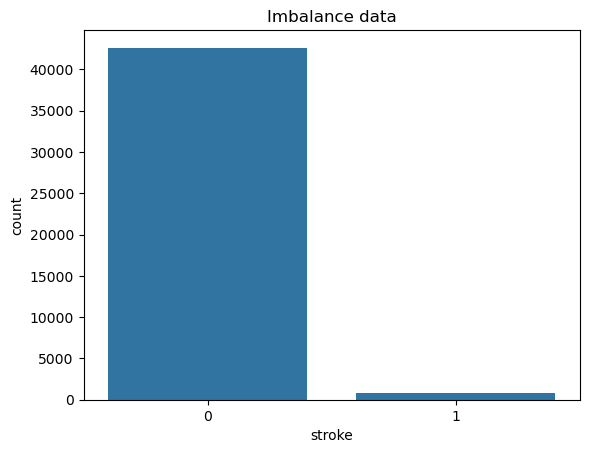

In [101]:
sns.countplot(x='stroke', data=df)
plt.title("Imbalance data")
plt.show()

In [27]:
#percentage
(df.isnull().sum()/df.shape[0])*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [29]:
df['stroke'].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

In [103]:
#One Hot Encoding

In [31]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [33]:
df = pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
df.head(4)

id   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  30669   3.0             0              0              95.12  18.0       0   
1  30468  58.0             1              0              87.96  39.2       0   
2  16523   8.0             0              0             110.89  17.6       0   
3  56543  70.0             0              0              69.04  35.9       0   

   gender_Female  gender_Male  ever_married_No  ...  work_type_Govt_job  \
0          False         True             True  ...               False   
1          False         True            False  ...               False   
2           True        False             True  ...               False   
3           True        False            False  ...               False   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False              False                    False   
1                   False               True                    False   
2                   False               True                    False   
3                   False               True                    False   

   work_type_children  Residence_type_Rural  Residence_type_Urban  \
0                True                  True                 False   
1               False                 False                  True   
2               False                 False                  True   
3               False                  True                 False   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                           False                        False   
1                           False                         True   
2                           False                        False   
3                            True                        False   

   smoking_status_smokes  
0                  False  
1                  False  
2                  False  
3                  False  

[4 rows x 21 columns]

In [35]:
#Missing Value Handelling

In [37]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values=np.nan)
tab = imputer.fit_transform(df)
df_new = pd.DataFrame(tab, columns=df.columns)
df_new.head(10)

id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0  30669.0   3.0           0.0            0.0              95.12  18.0   
1  30468.0  58.0           1.0            0.0              87.96  39.2   
2  16523.0   8.0           0.0            0.0             110.89  17.6   
3  56543.0  70.0           0.0            0.0              69.04  35.9   
4  46136.0  14.0           0.0            0.0             161.28  19.1   
5  32257.0  47.0           0.0            0.0             210.95  50.1   
6  52800.0  52.0           0.0            0.0              77.59  17.7   
7  41413.0  75.0           0.0            1.0             243.53  27.0   
8  15266.0  32.0           0.0            0.0              77.67  32.3   
9  28674.0  74.0           1.0            0.0             205.84  54.6   

   stroke  gender_Female  gender_Male  ever_married_No  ...  \
0     0.0            0.0          1.0              1.0  ...   
1     0.0            0.0          1.0              0.0  ...   
2     0.0            1.0          0.0              1.0  ...   
3     0.0            1.0          0.0              0.0  ...   
4     0.0            0.0          1.0              1.0  ...   
5     0.0            1.0          0.0              0.0  ...   
6     0.0            1.0          0.0              0.0  ...   
7     0.0            1.0          0.0              0.0  ...   
8     0.0            1.0          0.0              0.0  ...   
9     0.0            1.0          0.0              0.0  ...   

   work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                 0.0                     0.0                0.0   
1                 0.0                     0.0                1.0   
2                 0.0                     0.0                1.0   
3                 0.0                     0.0                1.0   
4                 0.0                     1.0                0.0   
5                 0.0                     0.0                1.0   
6                 0.0                     0.0                1.0   
7                 0.0                     0.0                0.0   
8                 0.0                     0.0                1.0   
9                 0.0                     0.0                0.0   

   work_type_Self-employed  work_type_children  Residence_type_Rural  \
0                      0.0                 1.0                   1.0   
1                      0.0                 0.0                   0.0   
2                      0.0                 0.0                   0.0   
3                      0.0                 0.0                   1.0   
4                      0.0                 0.0                   1.0   
5                      0.0                 0.0                   0.0   
6                      0.0                 0.0                   0.0   
7                      1.0                 0.0                   1.0   
8                      0.0                 0.0                   1.0   
9                      1.0                 0.0                   0.0   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                   0.0                             0.0   
1                   1.0                             0.0   
2                   1.0                             0.0   
3                   0.0                             1.0   
4                   0.0                             0.0   
5                   1.0                             0.0   
6                   1.0                             1.0   
7                   0.0                             0.0   
8                   0.0                             0.0   
9                   1.0                             0.0   

   smoking_status_never smoked  smoking_status_smokes  
0                          0.0                    0.0  
1                          1.0                    0.0  
2                          0.0                    0.0  
3                          0.0                    0.0  
4                          

In [39]:
df_new.shape

(43400, 21)

In [41]:
df_new.isnull().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [43]:
df_new.dtypes

id                                float64
age                               float64
hypertension                      float64
heart_disease                     float64
avg_glucose_level                 float64
bmi                               float64
stroke                            float64
gender_Female                     float64
gender_Male                       float64
ever_married_No                   float64
ever_married_Yes                  float64
work_type_Govt_job                float64
work_type_Never_worked            float64
work_type_Private                 float64
work_type_Self-employed           float64
work_type_children                float64
Residence_type_Rural              float64
Residence_type_Urban              float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
dtype: object

In [45]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


In [47]:
df.head()

id   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  30669   3.0             0              0              95.12  18.0       0   
1  30468  58.0             1              0              87.96  39.2       0   
2  16523   8.0             0              0             110.89  17.6       0   
3  56543  70.0             0              0              69.04  35.9       0   
4  46136  14.0             0              0             161.28  19.1       0   

   gender_Female  gender_Male  ever_married_No  ...  work_type_Govt_job  \
0          False         True             True  ...               False   
1          False         True            False  ...               False   
2           True        False             True  ...               False   
3           True        False            False  ...               False   
4          False         True             True  ...               False   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False              False                    False   
1                   False               True                    False   
2                   False               True                    False   
3                   False               True                    False   
4                    True              False                    False   

   work_type_children  Residence_type_Rural  Residence_type_Urban  \
0                True                  True                 False   
1               False                 False                  True   
2               False                 False                  True   
3               False                  True                 False   
4               False                  True                 False   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                           False                        False   
1                           False                         True   
2                           False                        False   
3                            True                        False   
4                           False                        False   

   smoking_status_smokes  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 21 columns]

In [49]:
#One Hot Encoding

In [53]:
#Converting the categorical values, indicator variables

In [55]:
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [59]:
#Duplicate value finding

In [61]:
df.duplicated().sum()

0

In [63]:
#Exploratory Data Analysis (EDA)

In [65]:
df.describe().T

count          mean           std    min       25%  \
id                 43400.0  36326.142350  21072.134879   1.00  18038.50   
age                43400.0     42.217894     22.519649   0.08     24.00   
hypertension       43400.0      0.093571      0.291235   0.00      0.00   
heart_disease      43400.0      0.047512      0.212733   0.00      0.00   
avg_glucose_level  43400.0    104.482750     43.111751  55.00     77.54   
bmi                41938.0     28.605038      7.770020  10.10     23.20   
stroke             43400.0      0.018041      0.133103   0.00      0.00   

                        50%       75%       max  
id                 36351.50  54514.25  72943.00  
age                   44.00     60.00     82.00  
hypertension           0.00      0.00      1.00  
heart_disease          0.00      0.00      1.00  
avg_glucose_level     91.58    112.07    291.05  
bmi                   27.70     32.90     97.60  
stroke                 0.00      0.00      1.00

In [67]:
#Histogram for understanding the distribution of data

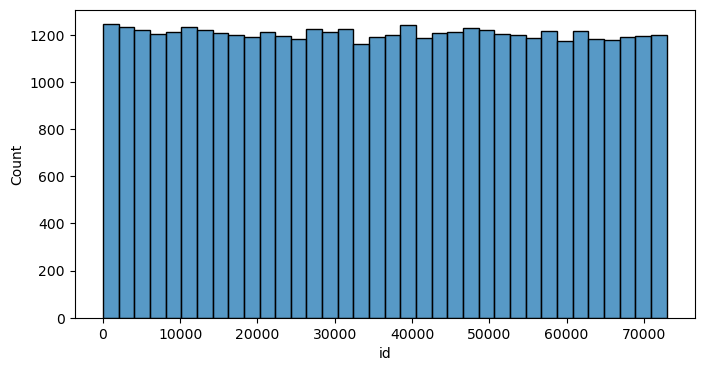

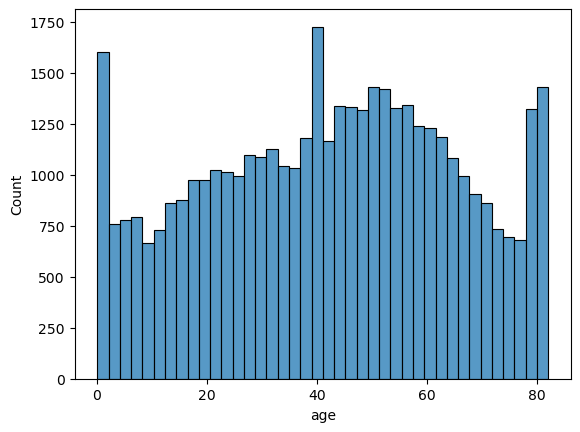

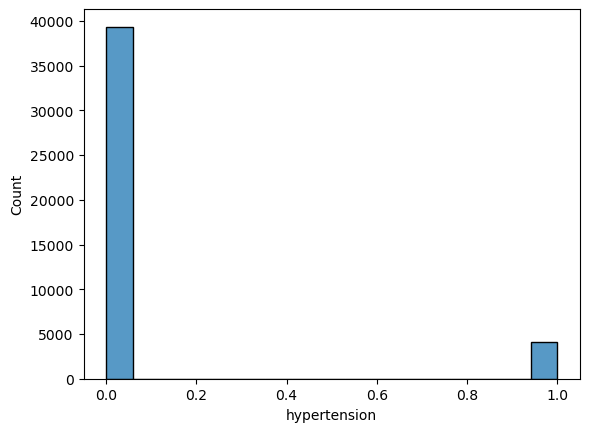

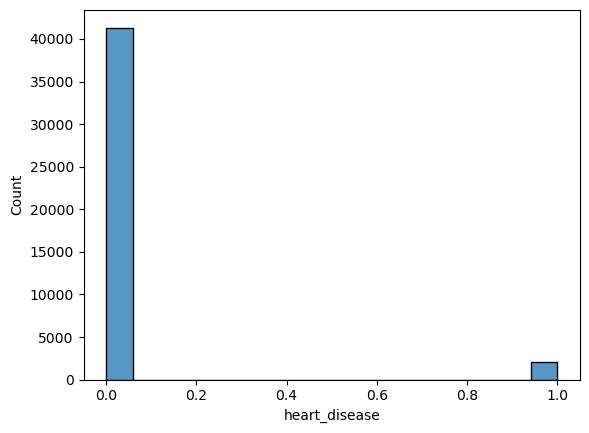

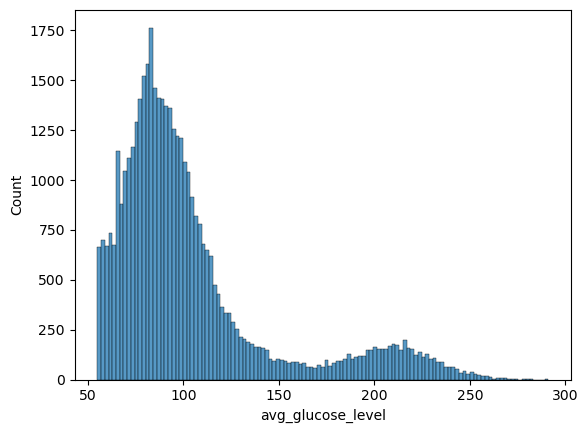

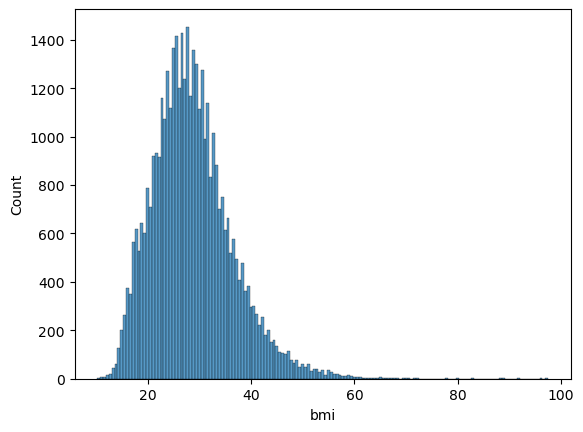

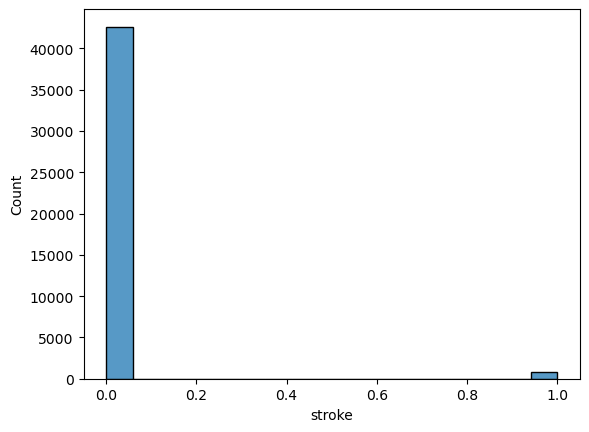

In [69]:
#to ignore errors :
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=[8,4])

#for each column of number type histogram
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()

In [71]:
# Box plot for outliers:

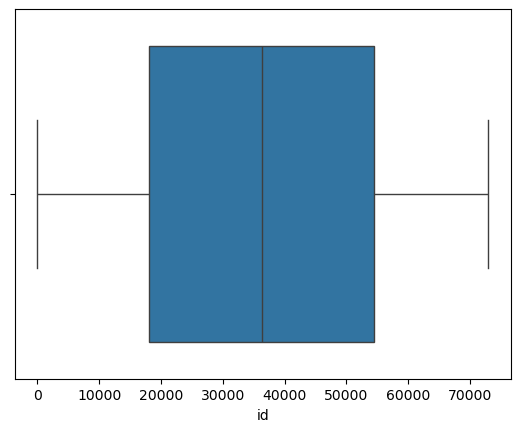

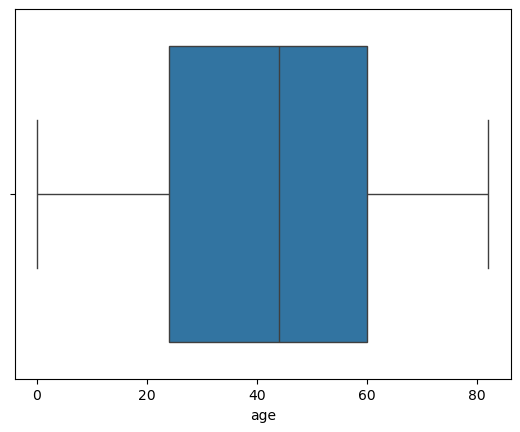

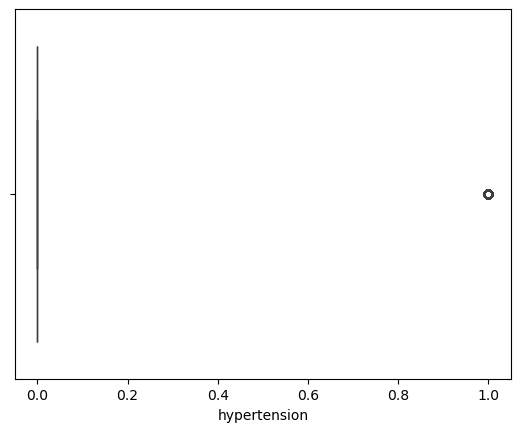

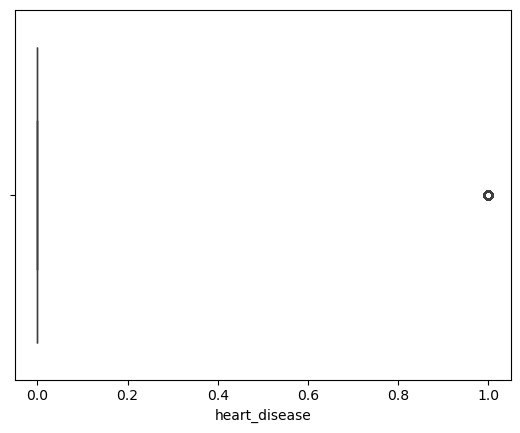

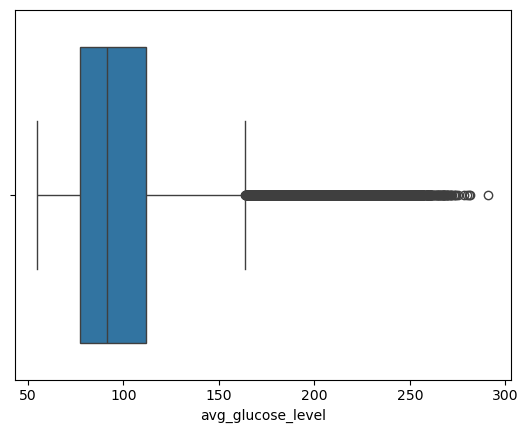

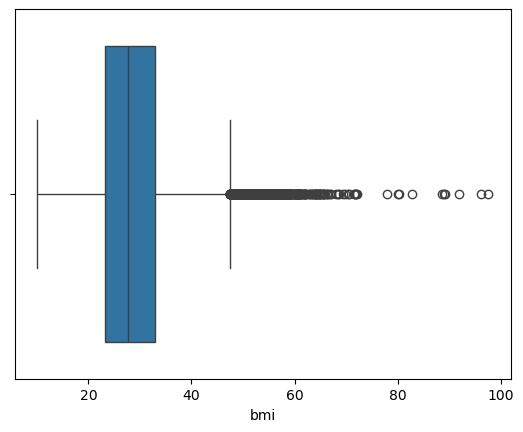

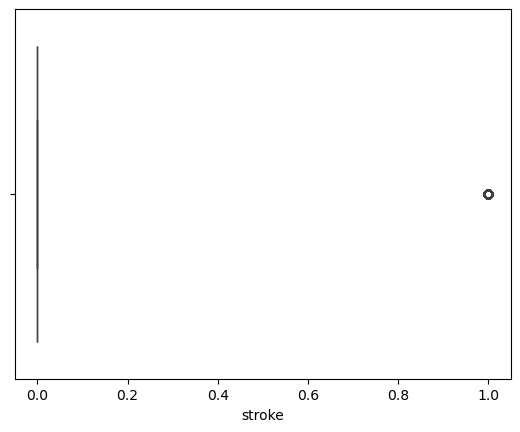

In [73]:
import warnings
warnings.filterwarnings('ignore')

#boxplot for the number data columns
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [75]:
#avg_glucose_level
#25%
a= 77.54
#50% 
b= 91.58
#75% 
c= 112.07
interq = c+1.5*(c-a)
print(interq)

163.86499999999998


In [77]:
#bmi
#25%
a=23.40	
#50% 
b= 28.10	
#75% 
c= 32.06
interq = c+1.5*(c-a)
print(interq)

45.05000000000001


In [79]:
def wisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr=q3-q1
    lw = q1-1.5*iqr
    uw = q3+1.5*iqr
    return lw,uw

In [81]:
wisker(df['avg_glucose_level'])

(25.745000000000026, 163.86499999999998)

In [83]:
wisker(df['bmi'])

(nan, nan)

In [85]:
df.select_dtypes(include='number').columns
for i in ['bmi','avg_glucose_level']:
    lw,uw = wisker(df[i])
    df[i] = np.where(df[i]<lw,lw,df[i])
    df[i] = np.where(df[i]>uw,uw,df[i])

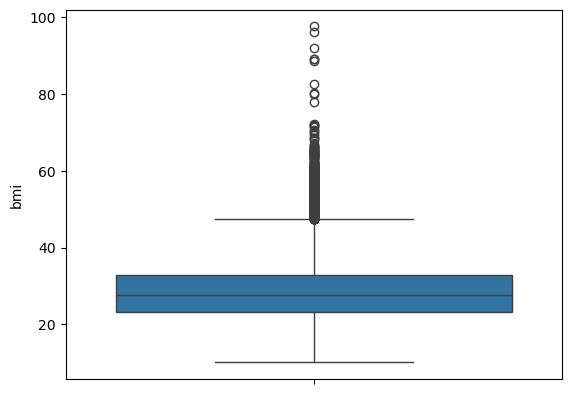

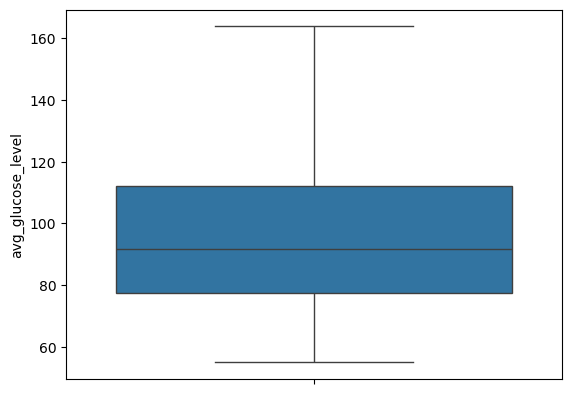

In [87]:
for i in ['bmi','avg_glucose_level']:
    sns.boxplot(df[i])
    plt.show()

In [89]:
df.describe().T

count          mean           std    min       25%  \
id                 43400.0  36326.142350  21072.134879   1.00  18038.50   
age                43400.0     42.217894     22.519649   0.08     24.00   
hypertension       43400.0      0.093571      0.291235   0.00      0.00   
heart_disease      43400.0      0.047512      0.212733   0.00      0.00   
avg_glucose_level  43400.0     99.394985     30.752072  55.00     77.54   
bmi                41938.0     28.605038      7.770020  10.10     23.20   
stroke             43400.0      0.018041      0.133103   0.00      0.00   

                        50%       75%        max  
id                 36351.50  54514.25  72943.000  
age                   44.00     60.00     82.000  
hypertension           0.00      0.00      1.000  
heart_disease          0.00      0.00      1.000  
avg_glucose_level     91.58    112.07    163.865  
bmi                   27.70     32.90     97.600  
stroke                 0.00      0.00      1.000

In [145]:
#Scatter plot

In [127]:
num_columns = df.select_dtypes(include='number').columns
print(num_columns)

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


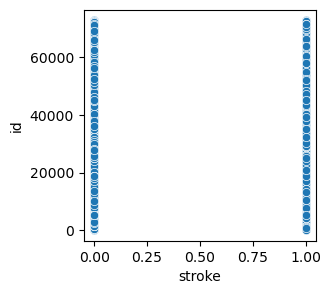

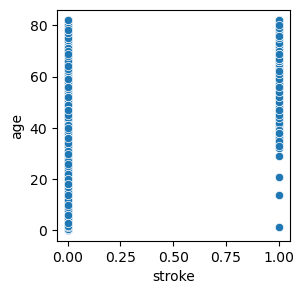

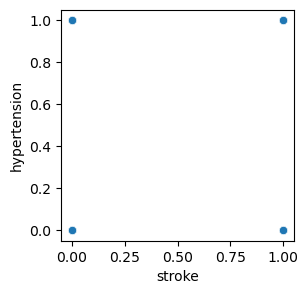

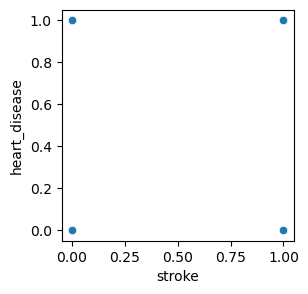

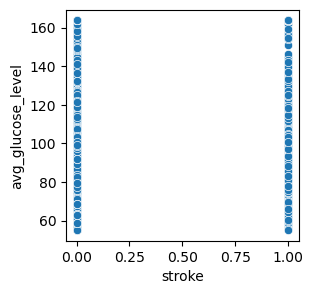

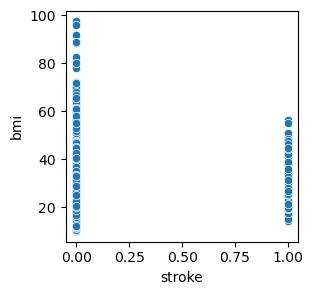

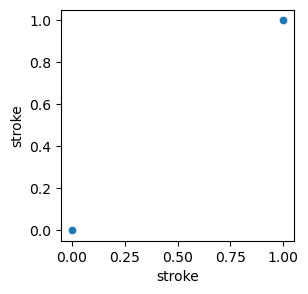

In [129]:
for i in df.select_dtypes(include='number').columns:
    plt.figure(figsize=[3,3])
    sns.scatterplot(data=df,y=i,x='stroke')
    plt.show()

In [131]:
for i in df.select_dtypes(include='object').columns:
    plt.figure(figsize=[3,3])
    sns.scatterplot(data=df,y=i,x='stroke')
    plt.show()

In [133]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include='number').corr()

<Axes: >

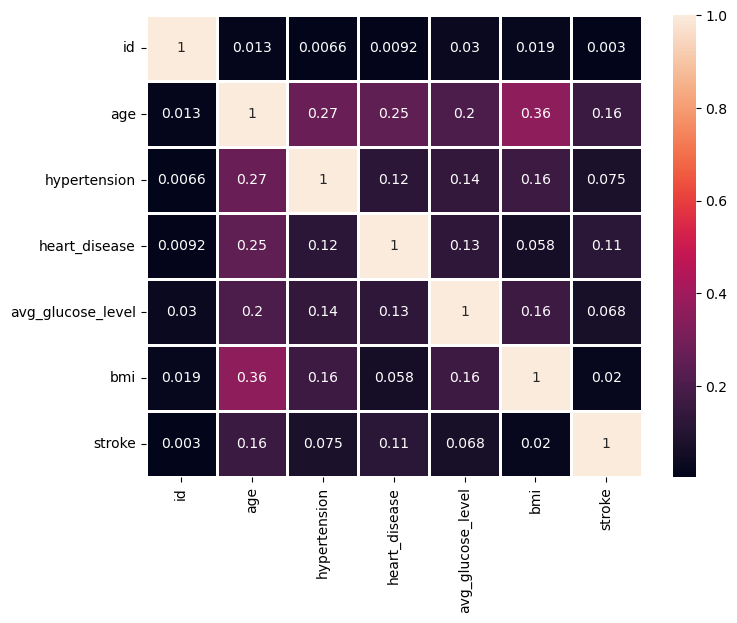

In [135]:
plt.figure(figsize=[8,6])
sns.heatmap(s,annot=True,linewidth=1)

In [137]:
num_columns = df.select_dtypes(include='number').columns
print(num_columns)

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


In [139]:
cat_columns = df.select_dtypes(include='object').columns
print(cat_columns)

Index([], dtype='object')


In [141]:
df= df.drop(columns='id',axis=1)
df

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0       3.0             0              0             95.120  18.0       0   
1      58.0             1              0             87.960  39.2       0   
2       8.0             0              0            110.890  17.6       0   
3      70.0             0              0             69.040  35.9       0   
4      14.0             0              0            161.280  19.1       0   
...     ...           ...            ...                ...   ...     ...   
43395  10.0             0              0             58.640  20.4       0   
43396  56.0             0              0            163.865  55.4       0   
43397  82.0             1              0             91.940  28.9       0   
43398  40.0             0              0             99.160  33.2       0   
43399  82.0             0              0             79.480  20.6       0   

       gender_Female  gender_Male  ever_married_No  ever_married_Yes  \
0              False         True             True             False   
1              False         True            False              True   
2               True        False             True             False   
3               True        False            False              True   
4              False         True             True             False   
...              ...          ...              ...               ...   
43395           True        False             True             False   
43396           True        False            False              True   
43397           True        False            False              True   
43398          False         True            False              True   
43399           True        False            False              True   

       work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                   False                   False              False   
1                   False                   False               True   
2                   False                   False               True   
3                   False                   False               True   
4                   False                    True              False   
...                   ...                     ...                ...   
43395               False                   False              False   
43396                True                   False              False   
43397               False                   False               True   
43398               False                   False               True   
43399               False                   False               True   

       work_type_Self-employed  work_type_children  Residence_type_Rural  \
0                        False                True                  True   
1                        False               False                 False   
2                        False               False                 False   
3                        False               False                  True   
4                        False               False                  True   
...                        ...                 ...                   ...   
43395                    False                True                 False   
43396                    False               False                 False   
43397                    False               False                 False   
43398                    False               False                 False   
43399                    False               False                 False   

       Residence_type_Urban  smoking_status_formerly smoked  \
0                     False                           False   
1                      True                           False   
2                      True                           False   
3                     False                            True   
4                     False                           False   
...                     ...                             ...   

In [151]:
# Calculate correlation matrix

In [153]:
corr_matrix = df.corr()

In [157]:
# Plot the heatmap

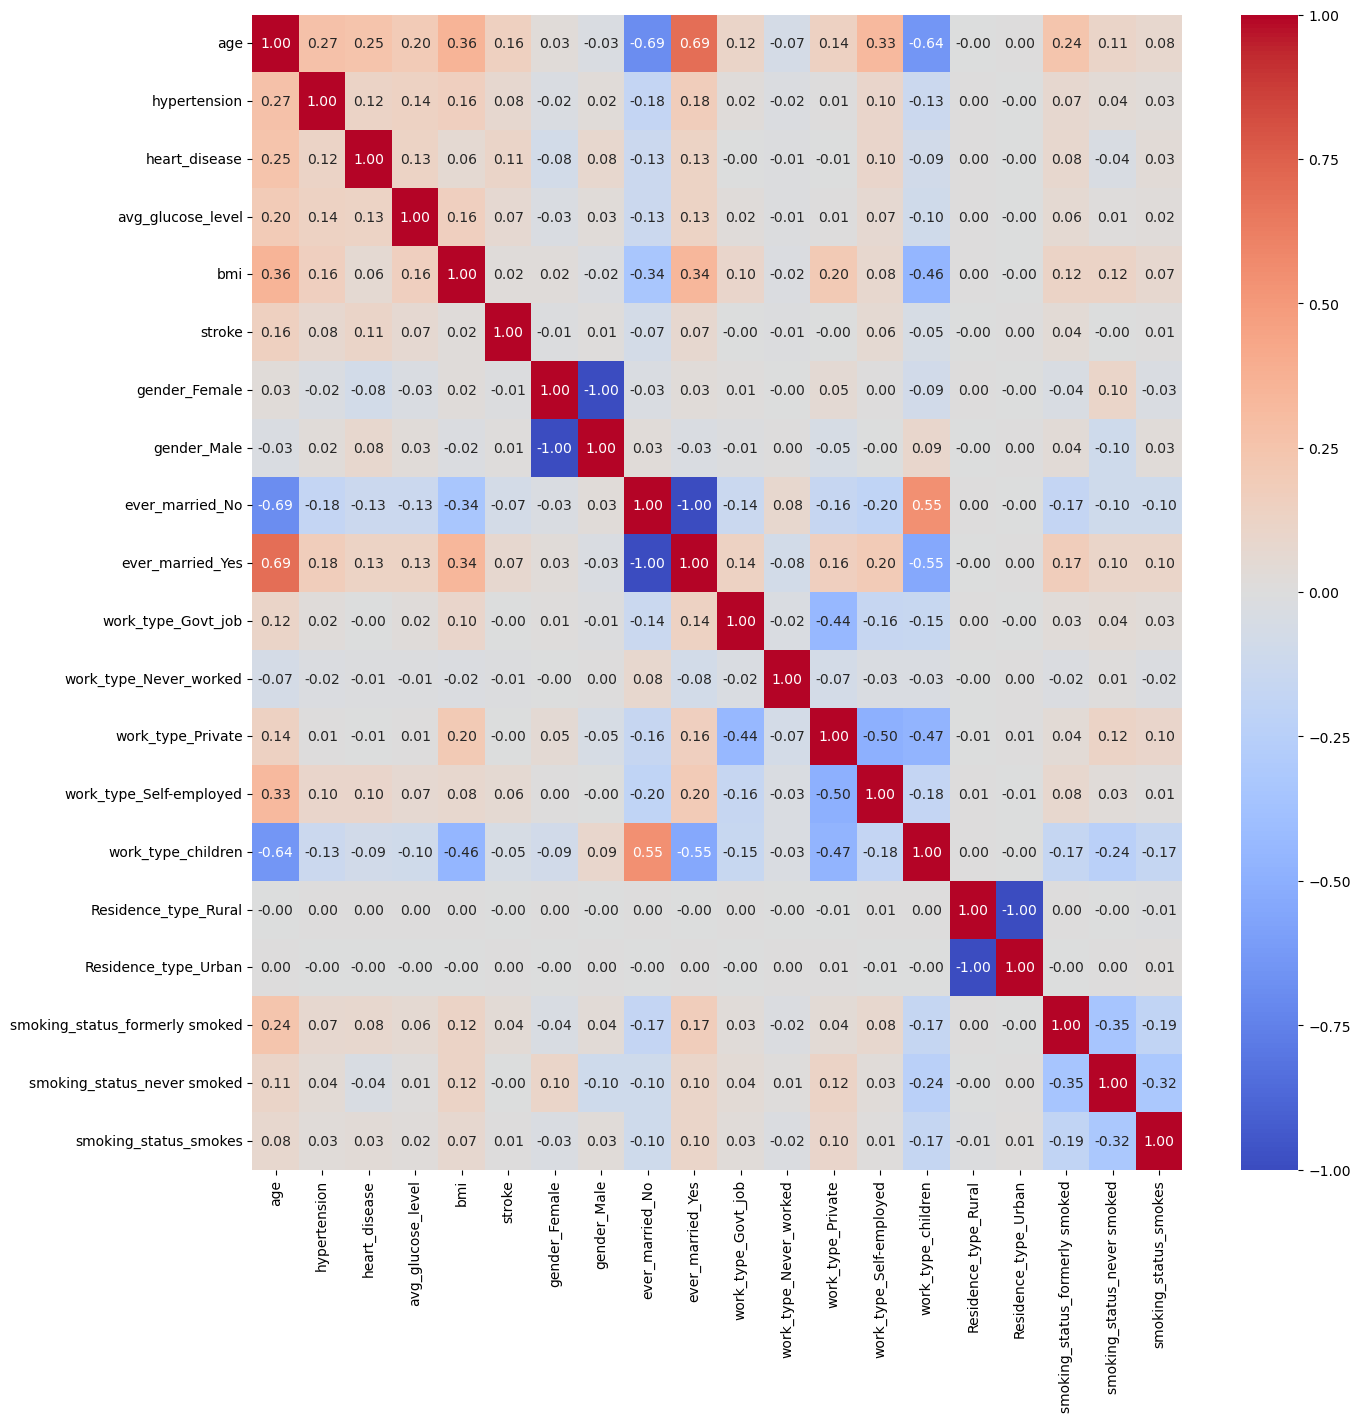

In [159]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [161]:
data = df

In [181]:
p = df.drop('stroke',axis=1)
q = df['stroke']

In [183]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [185]:
oversample = RandomOverSampler(sampling_strategy='minority')
p_res, q_res = oversample.fit_resample(p, q)
print("Original data :",Counter(q))
print("Balanced data :", Counter(q_res))

Original data : Counter({0: 42617, 1: 783})
Balanced data : Counter({0: 42617, 1: 42617})


In [187]:
print(p_res.shape)
print(q_res.shape)

(85234, 19)
(85234,)


In [189]:
#Data Spliting (7:3)

In [191]:
from sklearn.model_selection import train_test_split

In [193]:
p_train,p_test,q_train,q_test = train_test_split(p_res,q_res,test_size=0.3,random_state=42)
print("p_train :",p_train.shape)
print("p_test :",p_test.shape)
print("q_train :",q_train.shape)
print("q_test :",q_test.shape)

p_train : (59663, 19)
p_test : (25571, 19)
q_train : (59663,)
q_test : (25571,)


In [197]:
# total 1 : 12793
# total 0 : 12778
tp = 10596
tn = 9388
fp = 3390
fn = 2197
p=(tp/(tp+fp))*100
r=(tp/(tp+fn))*100
print('precision = ',(tp/(tp+fp))*100)#Precision is the ratio of true positive predictions to the total predicted positives. It measures the accuracy of positive predictions made by the model.
print('recall = ',(tp/(tp+fn))*100)#recall is the ratio of true positive to the acutal positives.
print('f1_score = ',2*((p*r)/(p+r)))#The F1 score is particularly useful when you need to account for both false positives and false negatives 

precision =  75.76147576147577
recall =  82.82654576721644
f1_score =  79.1366369169872


In [213]:
#Machine Learning Model

In [215]:
X = df_new.drop('stroke',axis=1)
y = df_new['stroke']

In [217]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

In [219]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

In [221]:
knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = [knn, nb, dt, rf]

for model in models:
    print("MODEL NAME: ", model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))

MODEL NAME:  KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     12785
         1.0       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020

MODEL NAME:  GaussianNB()
              precision    recall  f1-score   support

         0.0       1.00      0.22      0.36     12785
         1.0       0.02      0.99      0.04       235

    accuracy                           0.23     13020
   macro avg       0.51      0.60      0.20     13020
weighted avg       0.98      0.23      0.35     13020

MODEL NAME:  DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     12785
         1.0       0.05      0.06      0.06       235

    accuracy                           0.96     13020
   macro avg       0.52     

In [223]:
#OverSampling

In [225]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=1)
X_os, y_os = os.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,test_size=0.3,random_state=1)

for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     12883
         1.0       0.88      0.99      0.93     12688

    accuracy                           0.93     25571
   macro avg       0.94      0.93      0.93     25571
weighted avg       0.94      0.93      0.93     25571

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

         0.0       0.97      0.33      0.49     12883
         1.0       0.59      0.99      0.74     12688

    accuracy                           0.66     25571
   macro avg       0.78      0.66      0.62     25571
weighted avg       0.78      0.66      0.62     25571

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     12883
         1.0       0.97      0.98      0.97     12688

    accuracy                           0.97     25571
   macro avg       0.97      0.

In [227]:
#UnderSampling

In [229]:
from imblearn.under_sampling import RandomUnderSampler

us= RandomUnderSampler(random_state=1)
X_us, y_us = us.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_us,y_us,test_size=0.3,random_state=1)

for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.67      0.72      0.70       229
         1.0       0.72      0.66      0.69       241

    accuracy                           0.69       470
   macro avg       0.69      0.69      0.69       470
weighted avg       0.70      0.69      0.69       470

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

         0.0       0.92      0.31      0.46       229
         1.0       0.60      0.98      0.74       241

    accuracy                           0.65       470
   macro avg       0.76      0.64      0.60       470
weighted avg       0.76      0.65      0.61       470

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.69      0.68      0.68       229
         1.0       0.70      0.71      0.70       241

    accuracy                           0.69       470
   macro avg       0.69      0.

In [231]:
#Combining OverSampling and UnderSampling
##SMOTEEN combines SMOTE and Edited Nearest Neighbours(ENN). SMOTEEN performs upsampling and downsampling at the same time

In [233]:
from imblearn.combine import SMOTEENN

sample = SMOTEENN()
X_over,y_over = sample.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,random_state=1)

In [234]:
for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     11151
         1.0       0.96      1.00      0.98     12310

    accuracy                           0.98     23461
   macro avg       0.98      0.97      0.98     23461
weighted avg       0.98      0.98      0.98     23461

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

         0.0       0.97      0.38      0.55     11151
         1.0       0.64      0.99      0.78     12310

    accuracy                           0.70     23461
   macro avg       0.81      0.68      0.66     23461
weighted avg       0.80      0.70      0.67     23461

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97     11151
         1.0       0.96      0.97      0.97     12310

    accuracy                           0.97     23461
   macro avg       0.97      0.